# Checkpoint 1
#### Data Cleaning

In [1]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the csv files
companies=pd.read_csv("companies.txt",sep="\t", encoding = "ISO-8859-1")
rounds2=pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

In [3]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
len(rounds2["company_permalink"].unique())

90247

In [6]:
len(companies["permalink"].unique())

66368

### Number of Unique companies in rounds2 dataframe are 90247 and number of Unique companies in companies dataframe are 6638. Also,Permalink can be used as the Unique key for each company.

In [7]:
companies['permalink']=companies['permalink'].apply(lambda x: x.lower())
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
rounds2["company_permalink"]=rounds2['company_permalink'].apply(lambda x: x.lower())
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Checking if number of unique companies in rounds2 DF and companies DF are same 

In [9]:
len(rounds2['company_permalink'].unique())

66370

In [10]:
len(companies['permalink'].unique())

66368

### Yes there are 2 extra companies in rounds2 DF as compared to companies DF.

#### Lets Check for companies present in rounds2 DF but not in companies DF and remove them.

In [11]:
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


### As we see in rounds2 Df that there are weird characters at different indices. These weird characters are not present in actual CSV file. So this problem is because of improper decoding of csv file while importing.
### After searching a lot and trying all compaitible decodings(none of them worked) it can be concluded that it has multiple encoding. Searching Stackoverflow  we got into the conclusion that this problem can be solved with the following code:

In [12]:
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


### Now everything seems fine. There are no special characters left in rounds2 DF

In [13]:
len(rounds2['company_permalink'].unique())

66368

In [14]:
len(companies['permalink'].unique())

66368

### As we can see, after cleaning, now the number of unique companies in both rounds2 and companies df is same.

Let's check if companies DF also have special character.

In [15]:
companies.loc[~companies['permalink'].isin(rounds2['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
...,...,...,...,...,...,...,...,...,...,...
63833,/organization/whodatâs-spaces,Whodatâs Spaces,NaN,Apps,operating,NaN,NaN,NaN,NaN,NaN
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


### As we can see companies df also has special characters. We will need to filter this df also.

In [16]:
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.loc[~companies['permalink'].isin(rounds2['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


### Now companies df is also clean . As we see, now there are no companies in companies df that are not present in rounds2 df. Also ,there are no companies in rounds2 df that are not present in companies df. 

Now lets create a seperate csv file for both csv so that we dont have deal with encoding everytime we work.

In [17]:
rounds2.to_csv("rounds2_clean.csv",sep=",",index=False)
companies.to_csv("companies_clean.csv",sep="\t",index=False)

In [18]:
rounds2_clean=pd.read_csv("rounds2_clean.csv")
rounds2_clean.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [19]:
rounds2_clean.rename(columns={'company_permalink':'permalink'}, inplace=True)

Renamed company_permalink column to permalink so that I don't face any ambiguity during merge of both DF(rounds2_clean and companies_clean),

In [20]:
rounds2_clean.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Checking the number of missing values in permalink column of both the DFs

In [21]:
rounds2_clean.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [22]:
companies_clean=pd.read_csv("companies_clean.csv", sep="\t", encoding = "ISO-8859-1")
companies_clean.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

### There are no missing values in permalink of both df. So we are good to merge these 2 in a new df called master

In [23]:
master=pd.merge(companies_clean,rounds2_clean)
master.head(25)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


# Checkpoint 2
#### Funding Type Analysis

In [24]:
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [25]:
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### Finding the fraction of missing values(Column wise)

In [26]:
100*(master.isnull().sum())/len(master.index)

permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

### Let's drop the columns which have too much missing values or are not necessary for our analysis

In [27]:
master=master.drop(['funding_round_code','homepage_url','founded_at','state_code','region','city'],axis=1)

In [28]:
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


### Let's see again how much NaN values are left (column wise)

In [29]:
100*(master.isnull().sum())/len(master.index)

permalink                   0.000000
name                        0.000870
category_list               2.966533
status                      0.000000
country_code                7.549435
funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [30]:
master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

### Let's drop the rows in raised_amount_usd having NaN values

In [31]:
master.dropna(subset=['raised_amount_usd'], how='all', inplace=True)

In [32]:
100*(master.isnull().sum())/len(master.index)

permalink                  0.000000
name                       0.001053
category_list              1.099422
status                     0.000000
country_code               6.161607
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
dtype: float64

Now raised_amount_usd is filtered and it contains no more NaN values

In [33]:
master['country_code'].value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
SOM        1
GRD        1
MKD        1
QAT        1
PRY        1
Name: country_code, Length: 134, dtype: int64

### We saw in code lin 31 that there are almost 6.16% percent of rows missing the country_code. As this is very small % so we can delete these rows also.

In [34]:
master.dropna(subset=['country_code'], how='all', inplace=True)
100*(master.isnull().sum())/len(master.index)

permalink                  0.000000
name                       0.001122
category_list              0.649773
status                     0.000000
country_code               0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
dtype: float64

### So all NaN rows of country_code are deleted. We notice here that category_list and name are also having a very small % of NaN values. So lets also remove these too. 

In [35]:
master.dropna(subset=['category_list'], how='all', inplace=True)
100*(master.isnull().sum())/len(master.index)

permalink                  0.00000
name                       0.00113
category_list              0.00000
status                     0.00000
country_code               0.00000
funding_round_permalink    0.00000
funding_round_type         0.00000
funded_at                  0.00000
raised_amount_usd          0.00000
dtype: float64

In [36]:
master.dropna(subset=['name'], how='all', inplace=True)
100*(master.isnull().sum())/len(master.index)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [37]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88528 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88528 non-null object
name                       88528 non-null object
category_list              88528 non-null object
status                     88528 non-null object
country_code               88528 non-null object
funding_round_permalink    88528 non-null object
funding_round_type         88528 non-null object
funded_at                  88528 non-null object
raised_amount_usd          88528 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


### Now there's no NaN rows. Everything is filtered. Lets create a new clean df for future reference.

In [38]:
master.to_csv("master_df.csv",sep=",",index=False)

In [39]:
df=pd.read_csv("master_df.csv")

In [40]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


### We need to keep only the 4 funding types mentioned in Checkpoint so let's remove the unwanted ones

In [41]:
df=df[(df['funding_round_type']=="venture" )|
       (df['funding_round_type']=="seed") | 
       (df['funding_round_type']=="angel") | 
       (df['funding_round_type']=="private_equity")]

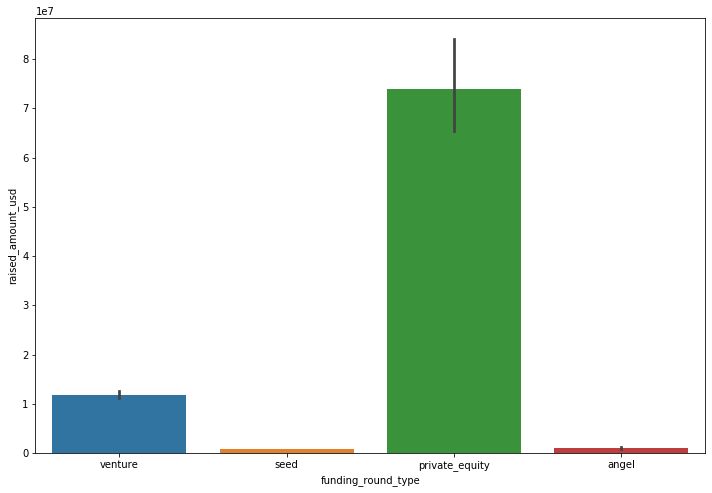

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(x="funding_round_type",y="raised_amount_usd",data=df)

In [43]:
df.describe()

,raised_amount_usd
count,7.512300e+04
mean,9.519601e+06
std,7.792829e+07
min,0.000000e+00
25%,4.708105e+05
50%,2.000000e+06
75%,8.000000e+06
max,1.760000e+10


### Checkpoint 2.2 asks for  the most representative value of the investment amount for each of the four funding types 

### It can be represented either through mean or median . So let's check the mean and median of different funding types

In [44]:
df.groupby("funding_round_type").mean()

,raised_amount_usd
funding_round_type,
angel,9.715739e+05
private_equity,7.393849e+07
seed,7.478279e+05
venture,1.172422e+07


In [45]:
df.groupby("funding_round_type").median()

,raised_amount_usd
funding_round_type,
angel,414906.0
private_equity,20000000.0
seed,300000.0
venture,5000000.0


### We see that the difference between the mean and median of all 4 funding types is very high.
### Also, It is given in the question that Spark Funds want to invest between 5M and 15 M $

### Let's assume mean to be the most representative value of the investment amount for each of the four types

### Upon giving a close look to the both mean and median of the 4 funding types, we see that mean of venture 11.72 M and median of venture 5M falls under the Spark's criteria of 5M-15M USD . So, by the analysis so far, venture seems to be most suitable investment for Spark Funds.

# Checkpoint 3
#### Country Analysis

#### Lets first quickly have a look at our rows and columns of df DataFrame

In [46]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


### Now filter the df for only venture type funding

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = df[df['funding_round_type']=="venture"]
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
country_wise_total


country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64

### Lets see the top 9 countries with highest amount of investment as asked in checkpoint 3.1.

In [48]:
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Text(0, 0.5, 'raised_amount_usd')

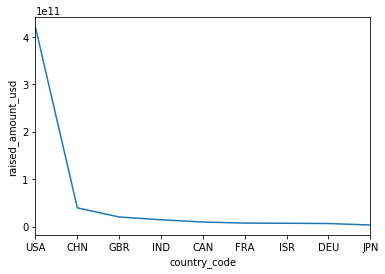

In [49]:
top_9_countries.plot()
plt.ylabel("raised_amount_usd")

### We can clearly see that excluding China, USA-Great Britain and India are top 3 maximum invested english speaking countries.

In [50]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [51]:
# filtered df has about 38803 observations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88517
Data columns (total 9 columns):
permalink                  38803 non-null object
name                       38803 non-null object
category_list              38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


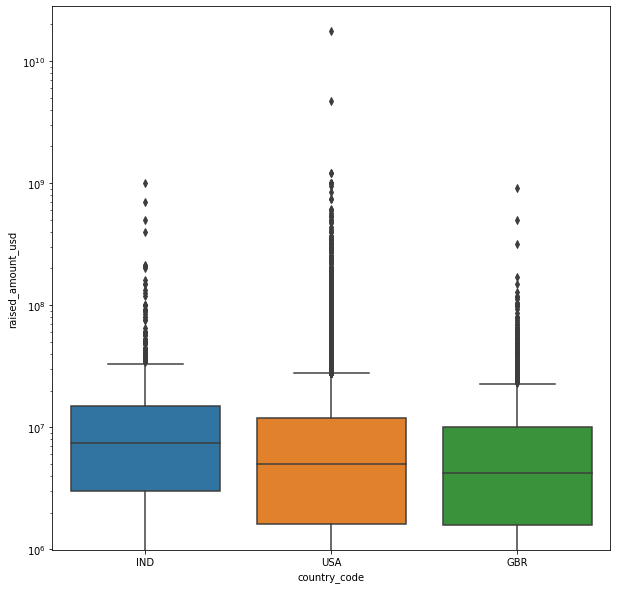

In [52]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

# Checkpoint 4
#### Sector Analysis 1

In [53]:
df.loc[:,'main_category']=df['category_list'].apply(lambda x: x.split('|')[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [54]:
# drop the category_list column
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [55]:
# read mapping file
mapping = pd.read_csv("mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [56]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [57]:
# missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [58]:
# remove the row with missing values
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()


category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [59]:
# converting common columns to lowercase
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()


In [60]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [61]:
df.head()


,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,apps


In [62]:
mapping['category_list'].head(35)


1                                     3d
2                            3d printing
3                          3d technology
4                             accounting
5                       active lifestyle
6                           ad targeting
7                     advanced materials
8                       adventure travel
9                            advertising
10                 advertising exchanges
11                  advertising networks
12                 advertising platforms
13                                advice
14                             aerospace
15                           agriculture
16                 air pollution control
17                            algorithms
18                           all markets
19                          all students
20                   alter0tive medicine
21                                alumni
22                              a0lytics
23                               android
24                                angels
25              

In [63]:
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
...,...,...,...,...,...,...,...,...,...
88269,/organization/zoopla,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,property management
88290,/organization/zopa,Zopa,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,finance
88291,/organization/zopa,Zopa,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,finance
88292,/organization/zopa,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance


In [64]:
mapping[~mapping['category_list'].isin(df['main_category'])]


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


### Now there's no row with missing values but we see that the in values of category_list "0" appears in place of "na". Lets first replace "0" with "na" wherever required.

In [65]:
# replacing '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'])

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object


### Now we need to merge mapping with df . So, lets make make common columns lower case

In [66]:
# merge the dfs
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [67]:
# let's drop the category_list column since it is the same as main_category
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
permalink                                  38788 non-null object
name                                       38788 non-null object
status                                     38788 non-null object
country_code                               38788 non-null object
funding_round_permalink                    38788 non-null object
funding_round_type                         38788 non-null object
funded_at                                  38788 non-null object
raised_amount_usd                          38788 non-null float64
main_category                              38788 non-null object
Automotive & Sports                        38788 non-null int64
Blanks                                     38788 non-null int64
Cleantech / Semiconductors                 38788 non-null int64
Entertainment                              38788 non-null int64
Health                                     38788 

### You’ll notice that the columns representing the main category in the mapping file are originally in the ‘wide’ format - Automotive & Sports, Cleantech / Semiconductors etc. They contain the value ‘1’ if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named ‘sub-category’ having these values. Let’s convert the df into the long format from the current wide format. First, we’ll store the ‘value variables’ (those which are to be melted) in an array. The rest will then be the ‘index variables’.


In [69]:
value_vars = df.columns[9:18]
id_vars=df.columns[0:9]
print(id_vars)
print(value_vars)

Index(['permalink', 'name', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'main_category'],
      dtype='object')
Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')


In [70]:
long_df = pd.melt(df,id_vars=list(id_vars),value_vars=list(value_vars))
long_df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,variable,value
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Automotive & Sports,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Automotive & Sports,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Automotive & Sports,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,Automotive & Sports,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Automotive & Sports,0


#### Keeping rows with value=1

In [71]:
long_df=long_df[long_df['value']==1]

In [72]:
long_df.head(35)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,variable,value
25828,/organization/3d-robotics,3D Robotics,operating,USA,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,05-11-2012,5000000.0,drones,Automotive & Sports,1
25829,/organization/3d-robotics,3D Robotics,operating,USA,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,23-04-2015,14000000.0,drones,Automotive & Sports,1
25830,/organization/3d-robotics,3D Robotics,operating,USA,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,12-09-2013,30000000.0,drones,Automotive & Sports,1
25831,/organization/3d-robotics,3D Robotics,operating,USA,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,25-02-2015,50000000.0,drones,Automotive & Sports,1
25832,/organization/cape-productions,Cape Productions,operating,USA,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,13-10-2015,10000000.0,drones,Automotive & Sports,1
25833,/organization/dronedeploy,DroneDeploy,operating,USA,/funding-round/bdf644f3fa66533c048719bf0d000893,venture,31-03-2015,9000000.0,drones,Automotive & Sports,1
25834,/organization/droneshield,DroneShield,operating,USA,/funding-round/0935e9fee6d86b49420da74cf4a3a94e,venture,04-05-2015,150000.0,drones,Automotive & Sports,1
25835,/organization/ehang,Ehang,operating,USA,/funding-round/3ffe5bfadb0a64d2d3c931d6a98c5683,venture,24-08-2015,42000000.0,drones,Automotive & Sports,1
25836,/organization/ehang,Ehang,operating,USA,/funding-round/cf1321bcd5745aade7e99eedaaa26ded,venture,30-12-2014,10000000.0,drones,Automotive & Sports,1
25837,/organization/yuneec-apv,Yuneec APV,operating,USA,/funding-round/ebb2406162ab04029c9d0c940ecd982e,venture,26-08-2015,60000000.0,drones,Automotive & Sports,1


In [73]:
len(long_df)

38788

In [74]:
long_df = long_df.rename(columns={'variable': 'sector'})


In [75]:
long_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 11 columns):
permalink                  38788 non-null object
name                       38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
main_category              38788 non-null object
sector                     38788 non-null object
value                      38788 non-null int64
dtypes: float64(1), int64(1), object(9)
memory usage: 3.6+ MB


### The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named ‘sector’ in the dataframe). We can now compute the sector-wise number(count) and the amount of investment in the three countries.

# Checkpoint 5
#### Sector Analysis 2

#### We need to keep investment within the range of 5M $-15M $

In [76]:
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]
df.head(25)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,sector,value
25828,/organization/3d-robotics,3D Robotics,operating,USA,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,05-11-2012,5000000.0,drones,Automotive & Sports,1
25829,/organization/3d-robotics,3D Robotics,operating,USA,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,23-04-2015,14000000.0,drones,Automotive & Sports,1
25832,/organization/cape-productions,Cape Productions,operating,USA,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,13-10-2015,10000000.0,drones,Automotive & Sports,1
25833,/organization/dronedeploy,DroneDeploy,operating,USA,/funding-round/bdf644f3fa66533c048719bf0d000893,venture,31-03-2015,9000000.0,drones,Automotive & Sports,1
25836,/organization/ehang,Ehang,operating,USA,/funding-round/cf1321bcd5745aade7e99eedaaa26ded,venture,30-12-2014,10000000.0,drones,Automotive & Sports,1
25857,/organization/bang-networks,Bang Networks,operating,USA,/funding-round/ba025fbc8bc3ca77ea945b61c4d21724,venture,05-11-2001,14000000.0,automated kiosk,Automotive & Sports,1
27343,/organization/additech,Additech,operating,USA,/funding-round/c1c50ebc27ce45adbdd21e0b121fd23a,venture,09-08-2006,6000000.0,automotive,Automotive & Sports,1
27344,/organization/agm-automotive,AGM Automotive,operating,USA,/funding-round/0ac85ce267380a3fd4a7e0cea153dfe1,venture,30-04-2014,12500000.0,automotive,Automotive & Sports,1
27346,/organization/airbiquity,Airbiquity,operating,USA,/funding-round/c6909a12d18862ebd5173dd1ee6abd6a,venture,13-09-2012,10419873.0,automotive,Automotive & Sports,1
27347,/organization/ani-technologies,Ola,operating,IND,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,5000000.0,automotive,Automotive & Sports,1


In [77]:
# groupby country, sector and compute the count and sum
d1=df[df["country_code"]=='USA'].groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

In [78]:
d1.head(10)

count           sum
country_code sector                                                      
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

In [79]:
d1["count"].sum()

12063

In [80]:
d1["sum"].sum()

107757097294.0

### So, Total number(count) of investment in USA is 12063 and sum is $ 107757097294.0 .

In [81]:
d2=df[df["country_code"]=='IND'].groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])
d2.head(10)

count           sum
country_code sector                                                      
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08

In [82]:
d2["count"].sum()

328

In [83]:
d2["sum"].sum()

2949543602.0

### So, Total number(count) of investment in India is 328 and sum is $ 2949543602.0.

In [84]:
d3=df[df["country_code"]=='GBR'].groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])
d3.head(10)

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09

In [85]:
d3["count"].sum()

621

In [86]:
d3["sum"].sum()

5379078691.0

### So, Total number(count) of investment in GBR is 621 and sum is $ 5379078691.00 .

## So by far our analysis, top country in terms of the number of investments and total amount invested is USA. The sectors 'Others', 'Social,FInance, Analytics and Advertising' and 'Cleantech/Semiconductors' are top 3 most heavily invested sectors.
## So if an investment has to be made, it must be made in 'Others'. If you don't want to consider 'Others' then 'Social,FInance, Analytics and Advertising' is the next best option.

# -------------------------------------------------XXX-----------------------------------------------------